In [6]:
### DISCLAIMER: I wanted to use this opportunity to have fun and enjoy this activity than see it as an interviewing task. I may not be the best coder, but I am passionate and enjoy learning and always receptive to feedback. I just love doing these things!
### IMPORTANT NOTE: AI was NOT used for this assignment. Full transparency: I used my own previous notebooks and work I had done (my portfolio on github, along with other interview coding assignments I had to my avail) as reference material
### This notebook may not be the best optimized! It is intended to show my full thoughtprocess!
### I would have to loved to use Polars for this activity as with a large dataset, using the Lazy load is nice, but I am not so familiar with it yet, so I have gone ahead with Pandas.

### Check out some of the cool related ML work I have done: https://www.linkedin.com/posts/activity-7250330952751529984-OXUA?utm_source=share&utm_medium=member_desktop&rcm=ACoAAC4ogFUBIyWm90kn6-pxkrZHxceN15bMzE0
### https://github.com/AbhinavRMohan/kansatsu

In [7]:
### The goal of this notebook is to create a simple q-a bot trained using NLP (we are not using LLMs here) to generate a response to the user. There are different approaches to be taken such as using tensorflow/LSTM, keras, etc.
### While I did not expand the data here, there is tons of medical q/a data sets out there
### Hope you enjoy!

In [20]:
import os

In [21]:
## Explore the Data!

In [22]:
import pandas as pd

qa_dataset = pd.read_csv('mle_screening_dataset.csv')

In [23]:
# let's see how this dataset looks

qa_dataset.head()

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."


In [24]:
# We already see duplicate

In [25]:
qa_dataset.tail()

,question,answer
16401,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...
16402,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac..."
16403,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...
16404,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...
16405,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...


In [26]:
## Check for Missing Data

In [27]:
missing_data = qa_dataset.isna().sum()
missing_percentage = (missing_data / len(qa_dataset))* 100
display(pd.DataFrame(missing_data).T)
display(pd.DataFrame(missing_percentage).T)

,question,answer
0,0,5


,question,answer
0,0.0,0.030477


In [28]:
# Okay, so looks like few answers are missing, let's see if they are missing at random!

<Axes: >

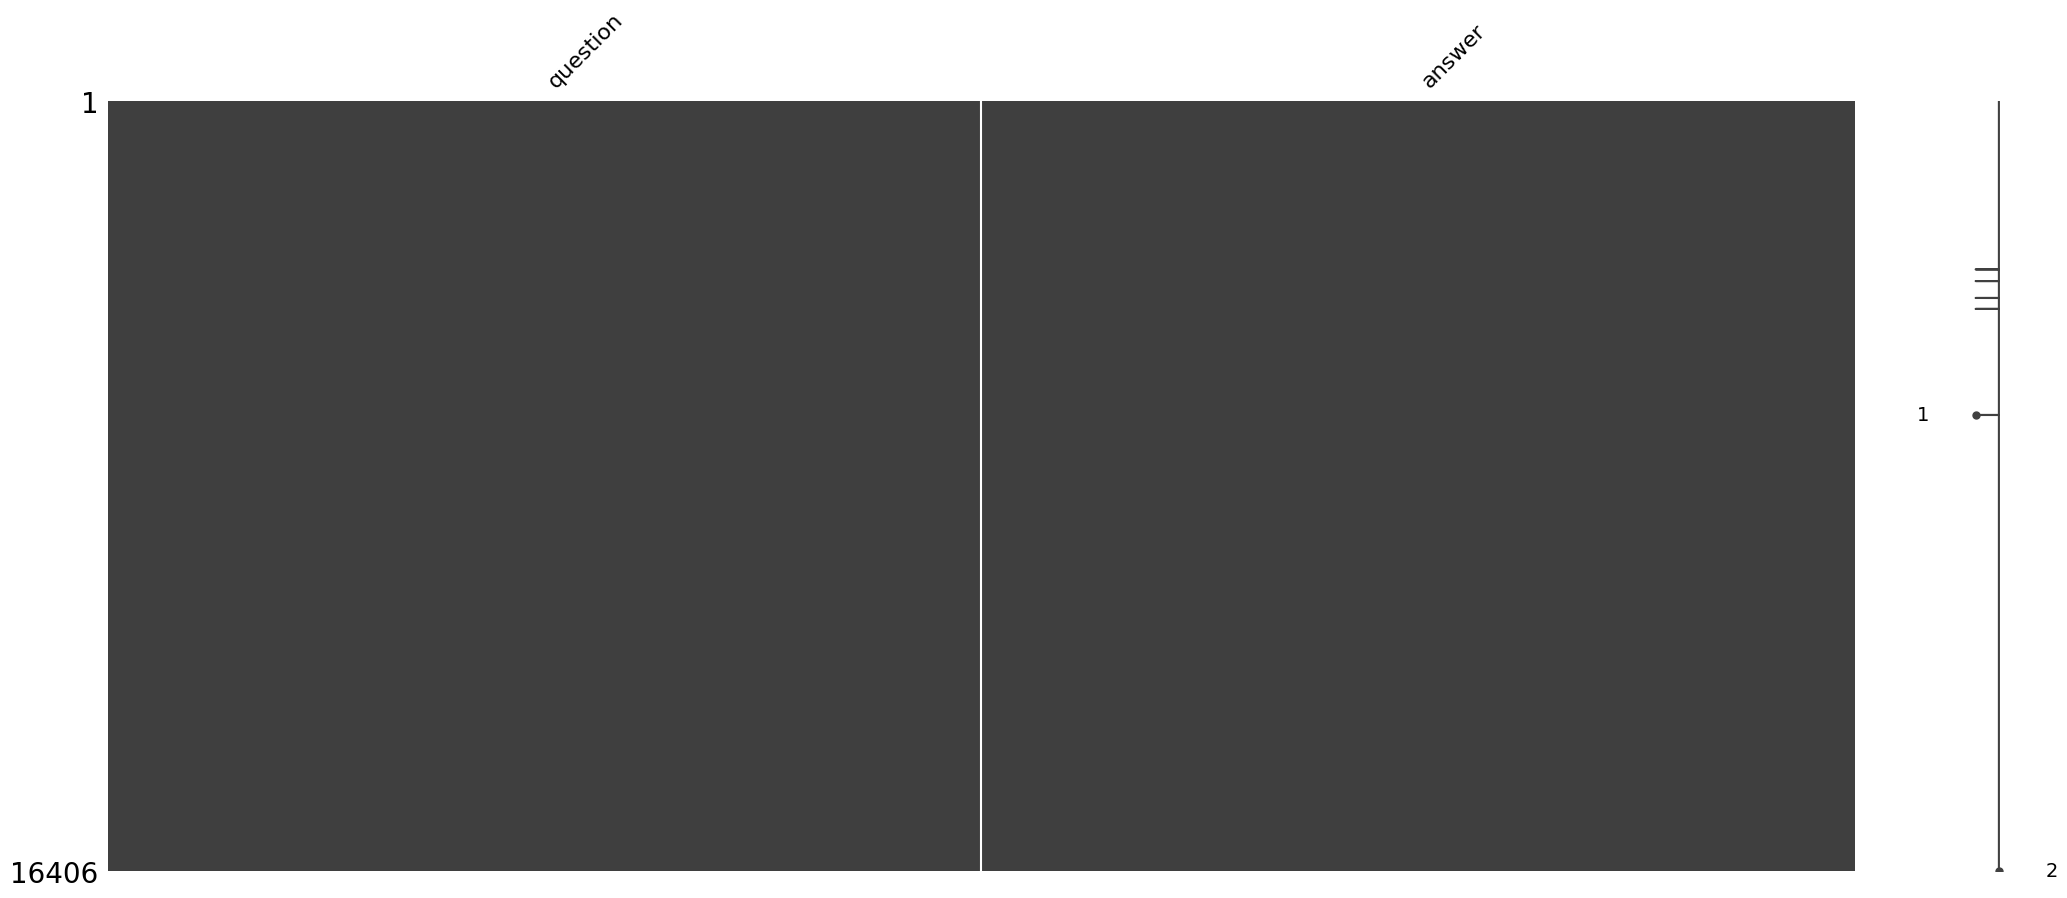

In [57]:
import missingno as ooo # If you are familiar with Pokemon, this is a fun one :) A captured MissingNo. is functional as a Pokémon and appears in the games' Pokédex as number 000. Probably not the best import short label, but fun nonetheless

ooo.matrix(qa_dataset)

In [30]:
# Looks like the data is missing at random! Since it is a small amount, I'm curious which rows are missing!!

missing_rows = qa_dataset[qa_dataset.isna().any(axis = 1)]
missing_rows

,question,answer
3587,What is (are) HELLP syndrome ?,NaN
3836,What is (are) X-linked lymphoproliferative syn...,NaN
4196,What is (are) Familial HDL deficiency ?,NaN
4429,What is (are) Emery-Dreifuss muscular dystroph...,NaN
6689,What is (are) Emery-Dreifuss muscular dystroph...,NaN


In [31]:
# For the sake of this activity, let's exclude these since it won't be useful for training.

qa_dataset_clean = qa_dataset.copy(deep = True)
qa_dataset_clean = qa_dataset_clean.dropna()
qa_dataset_clean

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."
...,...,...
16401,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...
16402,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac..."
16403,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...
16404,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...


In [32]:
# Now let's check for exact duplicates and remove them!

duplicates = qa_dataset_clean.duplicated()
view_duplicates = qa_dataset_clean[duplicates]
view_duplicates

,question,answer
15244,What causes Causes of Diabetes ?,Other types of diabetes have a variety of poss...
15311,What is (are) Kidney Failure: Eat Right to Fee...,You already know you need to watch how much yo...
15313,What is (are) Kidney Failure: Eat Right to Fee...,"Potassium is a mineral found in many foods, es..."
15315,What is (are) Kidney Failure: Eat Right to Fee...,Phosphorus is a mineral found in many foods. I...
15317,What is (are) Kidney Failure: Eat Right to Fee...,"Before you were on dialysis, your doctor may h..."
15319,What is (are) Kidney Failure: Eat Right to Fee...,Sodium is found in salt and other foods. Most ...
15321,What is (are) Kidney Failure: Eat Right to Fee...,Calories provide energy for your body. If your...
15338,What is (are) Causes of Diabetes ?,Diabetes is a complex group of diseases with a...
15339,What causes Causes of Diabetes ?,Type 1 diabetes is caused by a lack of insulin...
15340,What causes Causes of Diabetes ?,Type 2 diabetesthe most common form of diabete...


In [33]:
qa_dataset_clean = qa_dataset_clean[~duplicates]
qa_dataset_clean

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."
...,...,...
16401,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...
16402,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac..."
16403,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...
16404,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...


In [34]:
# We see that questions are duplicated. let's see them!

question_duplicates = qa_dataset_clean.question.duplicated()
view_question_duplicates = qa_dataset_clean[question_duplicates]
view_question_duplicates

,question,answer
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
8,Who is at risk for Glaucoma? ?,Encourage them to have a comprehensive dilated...
9,What is (are) Glaucoma ?,National Eye Institute National Institutes of...
15,What is (are) High Blood Pressure ?,Blood pressure is the force of blood pushing a...
...,...,...
16399,What is (are) Diabetic Neuropathies: The Nerve...,Diabetic neuropathy can be classified as perip...
16400,What is (are) Diabetic Neuropathies: The Nerve...,"Peripheral neuropathy, also called distal symm..."
16401,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...
16402,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac..."


In [35]:
# Let's see if any answers are duplicated.

answer_duplicates = qa_dataset_clean.answer.duplicated()
view_answer_duplicates = qa_dataset_clean[answer_duplicates]
view_answer_duplicates

,question,answer
862,what research (or clinical trials) is being do...,New types of treatment are being tested in cli...
873,what research (or clinical trials) is being do...,New types of treatment are being tested in cli...
901,what research (or clinical trials) is being do...,New types of treatment are being tested in cli...
910,what research (or clinical trials) is being do...,New types of treatment are being tested in cli...
930,what research (or clinical trials) is being do...,New types of treatment are being tested in cli...
...,...,...
16057,What is (are) Nutrition for Early Chronic Kidn...,CKD usually takes a long time to develop and d...
16078,What is (are) What I need to know about Hepati...,The liver is an organ that does many important...
16091,What is (are) What I need to know about Hepati...,The liver is an organ that does many important...
16211,What is (are) Urinary Tract Infection In Adults ?,A UTI is an infection in the urinary tract. In...


In [36]:
# Something looks suspicious with the questions and answers above! Let's dissect it~

question862 = qa_dataset_clean.iloc[862].question
question873 = qa_dataset_clean.iloc[873].question
answer862 = qa_dataset_clean.iloc[862].answer
answer873 = qa_dataset_clean.iloc[873].answer

print(question862)
print("")
print(answer862)
print("")
print("")
print(question873)
print("")
print(answer873)
print("")
print("")

what research (or clinical trials) is being done for Uterine Sarcoma ?

New types of treatment are being tested in clinical trials.
                    Information about clinical trials is available from the NCI website.
                
                
                    Patients may want to think about taking part in a clinical trial.
                    For some patients, taking part in a clinical trial may be the best treatment choice. Clinical trials are part of the cancer research process. Clinical trials are done to find out if new cancer treatments are safe and effective or better than the standard treatment.   Many of today's standard treatments for cancer are based on earlier clinical trials. Patients who take part in a clinical trial may receive the standard treatment or be among the first to receive a new treatment.   Patients who take part in clinical trials also help improve the way cancer will be treated in the future. Even when clinical trials do not lead to effective

In [37]:
# Now we have more clarity on why there is a canned response for some questions! But we need to identify if we have any "messy" questions which duplicate answers (i.e. "What is Glaucoma ?" vs. "What is Glaucoma?" vs. "What is Glaucoma? ?" are all currently treated as different questions but could have the same answer!!)
# Text Cleaning! Let's normalize the questions and answers to be all lower case and end with "?" and ".", respectively.

import re

def normalize_qa(qa_data, question_col = 'question', answer_col = 'answer'):
    qa_data.loc[:, question_col] = qa_data[question_col].str.lower()
    qa_data.loc[:, answer_col] = qa_data[answer_col].str.lower()
    qa_data.loc[:, question_col] = qa_data[question_col].str.strip() # Get rid of any begininng/ending spaces
    qa_data.loc[:, answer_col] = qa_data[answer_col].str.strip()

    def normalize_question(q):
      if not isinstance(q, str):
        return ""
      q = " ".join(q.split()) # Remove any unnecessary internal spaces
      q = re.sub(r"[^\w]+$", "", q) # Replace any non word/numeric character (special characters) with ""
      q = q + "?" # Now add a question mark at end
      return q

    def normalize_answer(a):
      if not isinstance(a, str):
        return ""
      a = " ".join(a.split()) # Remove any unnecessary internal spaces
      a = re.sub(r"[^\w]+$", "", a) # Replace any non word/numeric character (special characters) with ""
      a = a + "." # Now add a period at the end
      return a

    qa_data.loc[:, question_col] = qa_data[question_col].apply(normalize_question)
    qa_data.loc[:, answer_col] = qa_data[answer_col].apply(normalize_answer)

    return qa_data

qa_dataset_clean = normalize_qa(qa_dataset_clean)
qa_dataset_clean



,question,answer
0,what is (are) glaucoma?,glaucoma is a group of diseases that can damag...
1,what is (are) glaucoma?,the optic nerve is a bundle of more than 1 mil...
2,what is (are) glaucoma?,open-angle glaucoma is the most common form of...
3,who is at risk for glaucoma?,anyone can develop glaucoma. some people are a...
4,how to prevent glaucoma?,"at this time, we do not know how to prevent gl..."
...,...,...
16401,what is (are) diabetic neuropathies: the nerve...,autonomic neuropathy affects the nerves that c...
16402,what is (are) diabetic neuropathies: the nerve...,"proximal neuropathy, sometimes called lumbosac..."
16403,what is (are) diabetic neuropathies: the nerve...,focal neuropathy appears suddenly and affects ...
16404,how to prevent diabetic neuropathies: the nerv...,the best way to prevent neuropathy is to keep ...


In [38]:
# Now let's check for exact duplicates again and remove them if they exist!

duplicates = qa_dataset_clean.duplicated()
view_duplicates = qa_dataset_clean[duplicates]
view_duplicates

,question,answer


In [39]:
# We see that questions are duplicated. let's see them again!

question_duplicates = qa_dataset_clean.question.duplicated()
view_question_duplicates = qa_dataset_clean[question_duplicates]
view_question_duplicates

,question,answer
1,what is (are) glaucoma?,the optic nerve is a bundle of more than 1 mil...
2,what is (are) glaucoma?,open-angle glaucoma is the most common form of...
8,who is at risk for glaucoma?,encourage them to have a comprehensive dilated...
9,what is (are) glaucoma?,national eye institute national institutes of ...
15,what is (are) high blood pressure?,blood pressure is the force of blood pushing a...
...,...,...
16399,what is (are) diabetic neuropathies: the nerve...,diabetic neuropathy can be classified as perip...
16400,what is (are) diabetic neuropathies: the nerve...,"peripheral neuropathy, also called distal symm..."
16401,what is (are) diabetic neuropathies: the nerve...,autonomic neuropathy affects the nerves that c...
16402,what is (are) diabetic neuropathies: the nerve...,"proximal neuropathy, sometimes called lumbosac..."


In [40]:
# Let's see if any answers are duplicated too, just as a sanity check.

answer_duplicates = qa_dataset_clean.answer.duplicated()
view_answer_duplicates = qa_dataset_clean[answer_duplicates]
view_answer_duplicates

,question,answer
785,what research (or clinical trials) is being do...,new types of treatment are being tested in cli...
862,what research (or clinical trials) is being do...,new types of treatment are being tested in cli...
873,what research (or clinical trials) is being do...,new types of treatment are being tested in cli...
901,what research (or clinical trials) is being do...,new types of treatment are being tested in cli...
910,what research (or clinical trials) is being do...,new types of treatment are being tested in cli...
...,...,...
16078,what is (are) what i need to know about hepati...,the liver is an organ that does many important...
16091,what is (are) what i need to know about hepati...,the liver is an organ that does many important...
16211,what is (are) urinary tract infection in adults?,a uti is an infection in the urinary tract. in...
16263,what is (are) diabetic kidney disease?,"the kidneys are two bean-shaped organs, each a..."


In [41]:
# There are no exact row duplicates still, which is great! We see now that there are more rows aggregated for question and answer duplicates, that means many questions had issues with punctuations and needed to be cleaned up!

In [42]:
# Now, how do we deal with the same question with all its different answers?
  # - Should we aggregate them into a single response? (One potential issue here is what if there are contradictory answers for the same question?)
  # - Should we leave them as is? (The issue here is that for the same question, you may get a different answer each time. Is that reasonable? I personally don't think so; in a real system that would be considered inconsistent and unacceptable)
# For the sake of this activity, we will go with the first option.

agg_qa_dataset_clean = qa_dataset_clean.copy(deep = True)
agg_qa_dataset_clean = agg_qa_dataset_clean.groupby('question')

In [43]:
# Let's look at a set of duplicated questions with different answers

print(agg_qa_dataset_clean.get_group('what is (are) glaucoma?').answer[0])

glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. the most common form of the disease is open-angle glaucoma. with early treatment, you can often protect your eyes against serious vision loss. (watch the video to learn more about glaucoma. to enlarge the video, click the brackets in the lower right-hand corner. to reduce the video, press the escape (esc) button on your keyboard.) see this graphic for a quick overview of glaucoma, including how many people it affects, whos at risk, what to do if you have it, and how to learn more. see a glossary of glaucoma terms.


In [44]:
agg_qa_dataset_clean.get_group('what is (are) glaucoma?').answer[2270]

"glaucoma is a group of diseases that can damage the eye's optic nerve. it is a leading cause of blindness in the united states. it usually happens when the fluid pressure inside the eyes slowly rises, damaging the optic nerve. often there are no symptoms at first. without treatment, people with glaucoma will slowly lose their peripheral, or side vision. they seem to be looking through a tunnel. over time, straight-ahead vision may decrease until no vision remains. a comprehensive eye exam can tell if you have glaucoma. people at risk should get eye exams at least every two years. they include - african americans over age 40 - people over age 60, especially mexican americans - people with a family history of glaucoma there is no cure, but glaucoma can usually be controlled. early treatment can help protect your eyes against vision loss. treatments usually include prescription eyedrops and/or surgery. nih: national eye institute."

In [45]:
print(agg_qa_dataset_clean.get_group('what is (are) glaucoma?').answer[1])

the optic nerve is a bundle of more than 1 million nerve fibers. it connects the retina to the brain.


In [46]:
print(agg_qa_dataset_clean.get_group('what is (are) glaucoma?').answer[2])

open-angle glaucoma is the most common form of glaucoma. in the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. when the fluid reaches the angle, it flows through a spongy meshwork, like a drain, and leaves the eye. sometimes, when the fluid reaches the angle, it passes too slowly through the meshwork drain, causing the pressure inside the eye to build. if the pressure damages the optic nerve, open-angle glaucoma -- and vision loss -- may result.


In [47]:
agg_qa_dataset_clean.get_group('what is (are) glaucoma?').answer[9]

'national eye institute national institutes of health 2020 vision place bethesda, md 20892-3655 301-496-5248 e-mail: 2020@nei.nih.gov www.nei.nih.gov the glaucoma foundation 80 maiden lane, suite 700 new york, ny 10038 212-285-0080 glaucoma research foundation 251 post street, suite 600 san francisco, ca 94108 1-800-826-6693.'

In [48]:
# What we observe is a LOT of semantic similarity/redudancy! However, for sake of run time and efficiency, we will bypass trying to clean this up. The drawback is we may get redundant info!

# I just like to make sure dataframes don't get cross-contaminated here n there.. (I know it is not the most memory efficient! But for purposes of this test activity, I am just finnicky)

aggregated_qa_dataset = qa_dataset_clean.copy(deep = True)
aggregated_qa_dataset_final = aggregated_qa_dataset.groupby('question')['answer'].apply(lambda a: " ".join(a)).reset_index()
aggregated_qa_dataset_final.columns = ['question', 'answer']
aggregated_qa_dataset_final

,question,answer
0,are certain people at risk of getting vancomyc...,on this page general information what is vanco...
1,are there complications from botulism?,botulism can result in death due to respirator...
2,do you have information about a1c?,summary : a1c is a blood test for type 2 diabe...
3,do you have information about acupuncture?,summary : acupuncture has been practiced in ch...
4,do you have information about adoption?,summary : adoption brings a child born to othe...
...,...,...
14337,who is at risk for what i need to know about h...,"anyone can get hepatitis c, but those more lik..."
14338,who is at risk for what i need to know about i...,"both men and women can get ic/pbs, though twic..."
14339,who is at risk for what i need to know about m...,"any child can get a uti, though girls get utis..."
14340,who is at risk for wilms tumor and other child...,having certain genetic syndromes or other cond...


In [49]:
aggregated_qa_dataset_final.groupby('question').get_group('who is at risk for?').answer[14341]

"measles: make sure your child is protected with mmr vaccine measles starts with a fever. soon after, it causes a cough, runny nose, and red eyes. then a rash of tiny, red spots breaks out. measles can be serious for young children. learn about protecting your child from measles with mmr vaccine. protect your child at every age. click on your child's age group for vaccine information. view or print age-specific vaccine information [252 kb, 27 pages] records & requirements recording immunizations finding immunization records interpreting abbreviations on records immunization requirements for child care and schools making the vaccine decision how vaccines prevent diseases vaccine side effects/risks vaccine ingredients ensuring vaccine safety vaccines and your child’s immune system learn more about preteen and teen vaccines the vaccines for children program has helped prevent diseases and save lives…big time! [enlarged view] watch the immunization baby book learn what vaccines your child 

In [50]:
# looks like it worked! What we see is that not all questions are complete, some are vague, like the one above, so be prepared for vague questions like this to go awry unless its more specific!
# Also, not all answers may be complete sentences.

# One of the assumptions made here also, implicitly is that we did not go through and see what medical TOPICS are prevalent. There is possibility for bias as a result!

In [51]:
# Let's save our cleaned data for reuse later!

aggregated_qa_dataset_final.to_csv('aggregated_qa_dataset_final.csv', index = False)

In [52]:
## NOW we can get into the fun machine learning part

from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(aggregated_qa_dataset_final, test_size = 0.2, random_state = 42, shuffle = True)

val_data, test_data = train_test_split(temp_data, test_size = 0.5, random_state = 42, shuffle = True)

print(len(train_data), len(val_data), len(test_data), (len(train_data) + len(val_data) + len(test_data)))

11473 1434 1435 14342


In [53]:
# Let's think about what kind of model we want. If we want a generative or retrieval model.

# Overarching Assumptions:
# - Dataset Coverage: The data sufficiently represents the types of user questions expected in real usage. Unknown or highly novel questions beyond the dataset may not be answered accurately
# - Answer Accuracy: Each answer in the dataset is factually correct to be returned as-is
# - Single-Turn Conversations: The system is designed for single-turn queries (question-answer) and does not save a chat history
# - Text Preprocessing: Lowercase, white space removal port/starboard, punctuation resetting is sufficient to normalize questions and answers for similarity matching

# Generative Model:
# - Model creates answers based on training data
# - Pros:
# -- Can produce answers even for questions not in the dataset (reasoning)
# -- Can combine informaiton from multiple examples
# - Cons:
# -- Requires large datasets or pre-trained LLM fine-tuning
# -- Risk of hallucinations, especially since the data set is NOT large enough for such a task, and this is dangerous in the medical field (dataset is too small)

# Retrieval Model:
# - Model matches a user query to the closest stored question/answer
# - Pros:
# -- Safer to implement based on the dataset size, since it will return a real answer from the dataset
# -- Easier to implement and scales well with dataset size
# -- No hallucinations, since it is a direct retrieval
# - Cons:
# -- Cannot generate new text and is limited to what is in the dataset
# -- We did not semantically clean the q/a dataset; that means questions can be VERY similarly worded and give DIFFERENT answers still! We only aggregated by exact phraseology and thus, questions may give different answers at times

# Based on the pros and cons of each, taking into consideration the domain as well, we will go with a RETRIEVAL MODEL, because it ensures answers grounded in the data. The dataset (~14k queries) is suitable for building a semantic search system using embeddings, which allows us to do question/answer matching. A generative approach was not chosen, due to the risk of incorrect outputs and the small dataset size., which would make fine-tuning a transformer unreasonable


In [55]:
### Just as a disclaimer, I prefer to have imports as in when I need them, because I never know all the imports I need at the beginning itself!

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import numpy as np

qbot_vectorizer = TfidfVectorizer()
# The reason I chose TF-IDF, say over word2vec or GloVe is that with the way the data is structuerd as short question/answer pairs (even if there are 14k pairs), is that word2vec requires pretraining or a large corpus of text to train effectively
# For the current use case, being a small/moderate size dataset, training Word2Vec from scratch may not capture medical relationships correctly, and has limited domain-specific knowledge. Furthermore, word2vec captures
# context within a window of words. With very short sentences for some answers, and potentially a wide array of topics, there is not enough context to learning meaningful relationships, especially in the context of medical literature
# If you want to see how word2vec from scratch performed on a small topic specific dataset, check it out here: https://github.com/AbhinavRMohan/Word2Vec-From-Scratch/blob/main/word2vec_scratch.ipynb - Combining topics (be it very different literatures or even medical specialties)
# Would result in a challenge based on the data size, where with not so frequently occuring medical terminologies, word2vec embeddings may become unstable or meaningless.
q_train = qbot_vectorizer.fit_transform(train_data['question'])
q_val = qbot_vectorizer.transform(val_data['question'])
q_test = qbot_vectorizer.transform(test_data['question'])

# Training the model
qbot_knn_model = NearestNeighbors(n_neighbors = 1, metric = 'cosine').fit(q_train)

# define the response generation function
def generate_response(query):
    query_vector = qbot_vectorizer.transform([query])
    distances, indices = qbot_knn_model.kneighbors(query_vector)
    return train_data.iloc[indices[0]]['answer'].values[0]

# Validate the model
qa_val = []
for question in val_data['question']:
    qa_val.append(generate_response(question))

# Calculate the top 1 retrieval accuracy: how often the generated answer matches the expected
val_top1 = sum([predicted_answer == true for predicted_answer, true in zip(qa_val, val_data['answer'])]) / len(val_data)
print(f"Q/A Validation Top-1 Retrieval Accuracy: {val_top1*100:.2f}%")

val_cosine_similarity = []
for q, a in zip(val_data['question'], val_data['answer']):
    q_vec = qbot_vectorizer.transform([q])
    a_vec = qbot_vectorizer.transform([generate_response(q)])
    val_cosine_similarity.append(cosine_similarity(q_vec, a_vec)[0][0])

average_sim = sum(val_cosine_similarity) / len(val_cosine_similarity)
print(f"Average Cosine Similarity: {average_sim:.4f}")

# Test the model
qa_test = []
for question in test_data['question']:
    qa_test.append(generate_response(question))

test_top1 = sum([predicted_answer == true for predicted_answer, true in zip(qa_test, test_data['answer'])]) / len(test_data)
print(f"Q/A Test Top-1 Retrieval Accuracy: {test_top1*100:.2f}%")

# Example Interactions
example_questions = [
    "What is diabetes?",
    "How is hypertension treated?",
    "Can you explain asthma triggers?",
    "Tell me about glaucoma"
]

for q in example_questions:
    print(f"User: {q}")
    print(f"Response: {generate_response(q)}\n")



Q/A Validation Top-1 Retrieval Accuracy: 0.49%
Average Cosine Similarity: 0.3390
Q/A Test Top-1 Retrieval Accuracy: 0.21%
User: What is diabetes?
Response: too much glucose in the blood diabetes means your blood glucose (often called blood sugar) is too high. your blood always has some glucose in it because your body needs glucose for energy to keep you going. but too much glucose in the blood isn't good for your health. glucose comes from the food you eat and is also made in your liver and muscles. your blood carries the glucose to all of the cells in your body. insulin is a chemical (a hormone) made by the pancreas. the pancreas releases insulin into the blood. insulin helps the glucose from food get into your cells. if your body does not make enough insulin or if the insulin doesn't work the way it should, glucose can't get into your cells. it stays in your blood instead. your blood glucose level then gets too high, causing pre-diabetes or diabetes. types of diabetes there are three

In [42]:
## Future Improvements

# An ACTUAL Generative Model (torch)

# Semantic Embeddings:
# - Replace TF-IDF with BERT or other transformer based embeddings to handle various formats of questions and better capture the meaning
# - This will also increase accuracy for unseen queries while maintaining groundedness

# RAG based model
# - This is a significant step up from even a generative model, since we can evaluate the precision and recall of the retriver through context relevancy and accuracy through answer relevancy and faithfulness

# Multiturn Conversation:
# - Storing the chat history will improve UX with them able to have more interactions with the chat bot

# Dataset expansion
# - While we could have augmented the dataset with other data, this is something we can consider for the future as well to improve the robustness of the model and coverage

# User input handling:
# - Handle typos, misspellings, slangs, phraseology, etc. with better NLU methods (parts of speech recognition, name entity recognition, intent classifier)

In [ ]:
# Let's try a more generative approach using torch (I realized too late I misunderstood the directions, so here goes!)

# The model we will be using is the T5 model from Google, since it does a text-to-text analysis, making it usable for question and answering (although there are better models out there, I used this to the best of my knowledge)
# I worked in Google Colab, since I needed to use a GPU that is more powerful than my own. I used the T4 GPU

# Overarching Assumptions

# - Data:
# -- A subset of the data will be used for training and assumes that the entirety of the subset used contains sufficient information for training across different subject areas in medicine

# - Training:
# -- Limited computational use on free Google Colab - the base model may not be the best usecase here. A larger model would be more appropriate, also more trainability and finetuning would be required
# -- Adafactor optimizer chosen for efficiency

# - Use Case:
# -- Answers were truncated for training, so unsure how informative they would be (I ran into a LOT of issues while determining the model to use, setting it up on my dataset, where to prune, etc)

# - Evaluation:
# -- Same as Dataset Coverage above


In [58]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset

qa_model_name = "t5-base"
qa_model = AutoModelForSeq2SeqLM.from_pretrained(qa_model_name)
qa_tokenizer = AutoTokenizer.from_pretrained(qa_model_name)

# Learned the hard way when testing on all 14k pairs... not the smartest decision that kept me up at night...
# I learned about the Dataset integration with the huggingface models

qa_hf_data = Dataset.from_pandas(aggregated_qa_dataset_final[0:min(500, len(aggregated_qa_dataset_final))])
display(qa_hf_data)

Dataset({
    features: ['question', 'answer'],
    num_rows: 500
})

In [59]:
# Tokenize and make labels for our inputs

def make_label_izer(datafrac): # only using fraction of data
  questions = datafrac['question']
  answers = datafrac['answer']

  q_list = [f"question: {q}" for q in questions]

  qa_model_inputs = qa_tokenizer(
      q_list,
      max_length=256,
      truncation=True,
      padding=True
  )

  qa_labels = qa_tokenizer(
      answers,
      max_length=256,
      truncation=True,
      padding=True
  )

  qa_model_inputs["labels"] = qa_labels["input_ids"]

  return qa_model_inputs

processed_qa_dataset = qa_hf_data.map(
    make_label_izer,
    batched=True,
    remove_columns=qa_hf_data.column_names
)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [61]:
# I decided to go with training and testing data partition (instead of Train/Val/Test) due to compute and reduction in my data size for model building

train_test = processed_qa_dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
train_dataset = train_test["train"]
test_dataset = train_test["test"]
display(train_dataset)
display(test_dataset)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 400
})

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [62]:
# Let the training begin!! I had to look up a lot of documentation for this one: https://huggingface.co/docs/transformers/en/main_classes/trainer

training_args = Seq2SeqTrainingArguments(
    output_dir="./qa_model_output",
    num_train_epochs=10,
    per_device_train_batch_size=8,
    warmup_steps=500,
    learning_rate=3e-4,
    logging_dir="./logs",
    logging_steps=10,
    eval_strategy="epoch",
    report_to="none",
    optim="adafactor",
    weight_decay=0.01,
    predict_with_generate=True
)

data_collator = DataCollatorForSeq2Seq(
    qa_tokenizer,
    model=qa_model,
    padding=True
)

trainer = Seq2SeqTrainer(
    model=qa_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator
)

In [63]:
# Do the training

trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,5.151900,2.690824
2,1.747900,1.589230
3,1.628400,1.420498
4,1.406400,1.352682
5,1.245300,1.310357
6,1.291300,1.292243
7,1.108200,1.275581
8,1.131300,1.280320
9,1.002500,1.279091
10,0.964100,1.297784


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=500, training_loss=2.3073705558776854, metrics={'train_runtime': 189.5364, 'train_samples_per_second': 21.104, 'train_steps_per_second': 2.638, 'total_flos': 171269406720000.0, 'train_loss': 2.3073705558776854, 'epoch': 10.0})

In [64]:
# Save the model for later use

trainer.save_model("./qa_model")
qa_tokenizer.save_pretrained("./qa_model")

('./qa_model/tokenizer_config.json',
 './qa_model/special_tokens_map.json',
 './qa_model/spiece.model',
 './qa_model/added_tokens.json',
 './qa_model/tokenizer.json')

In [65]:
# Did some memory optimizing things here

def generate_answer(question):
    device = torch.device('cpu') # Use 'CPU'
    qa_model.to(device)
    qa_model.eval()  # Set to evaluation mode

    q = f"question: {question}"
    questions = qa_tokenizer(q, return_tensors="pt", max_length=256, truncation=True)

    questions = {k: v.to(device) for k, v in questions.items()} # Had to go to stack overflow for this one, because couldn't figure out an error prior to this: https://stackoverflow.com/questions/75678959/runtimeerror-input-output-and-indices-must-be-on-the-current-device

    with torch.no_grad():
        answers = qa_model.generate(
            **questions,
            max_length=150,
            min_length=20,
            num_beams=4,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=3
        )

    return qa_tokenizer.decode(answers[0], skip_special_tokens=True)

In [72]:
# Test the model
test_question = 'What is diabetes?'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: What is diabetes?
Generated Answer: diabetes is a condition that affects the blood sugar in your body. it occurs in people of all ages and ethnic backgrounds.


In [85]:
# Test the model
test_question = 'treatments for copd'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: treatments for copd
Generated Answer: treatments for copd include - a combination of drugs and physical therapy to treat copd - injections of copd drugs into the blood - oral copd tablets - topical copd injections - intravenous copd medications copd is one of the most common types of chronic obstructive pulmonary disease in the united states.


In [82]:
# Test the model
test_question = 'causes of glaucoma'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: causes of glaucoma
Generated Answer: glaucoma is one of the most common causes of blindness. it occurs in about 1 in 50,000 people worldwide.


In [83]:
# Test the model
test_question = 'Tell me about vaccines'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: Tell me about vaccines
Generated Answer: tell me about vaccines. vaccines are medicines that protect against diseases such as polio, tetanus, rubella, and rubella. if you have a vaccine, give it to someone you know who has a virus in your body. you can also take it to a doctor's office for a test of your immune system. Vaccines are safe, effective, and contain no side effects. you should not take vaccines unless you are pregnant or planning to be pregnant. - don't give me any side effects - do not give me a second chance to bevaccinated - tell me what you are doing - how much you are


In [87]:
# Test the model
test_question = 'What is hypertension?'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: What is hypertension?
Generated Answer: hypertension is a type of hypertension that affects the blood pressure of people who have high blood pressure. it is caused by a combination of factors known as hypertension and hypertension. hypertension occurs when blood pressure increases or decreases in a specific area of the body. this increases the risk of heart disease, stroke, or stroke. it can also be caused by other factors, such as diabetes, diabetes, or diabetes mellitus.


In [88]:
# Test the model
test_question = 'What is diabetes?'
print(f"Question: {test_question}")

generated_answer = generate_answer(test_question)
print(f"Generated Answer: {generated_answer}")

Question: What is diabetes?
Generated Answer: type 2 diabetes is a type of type 1 diabetes. it affects millions of people in the united states. it is more common in the u.s. than in other developed countries.


In [77]:
# Now let's get to EVALUATION!! We will use the model we saved
# Best I can think of are BLEU, ROUGE, METEOR, BERT. While I know there is answer relevancy, context relevancy, faithfulness for LLMs I am not sure I can use LLMs here, so going with this approach.

from rouge_score import rouge_scorer
from bert_score import score as bert_score
import evaluate

qa_model = AutoModelForSeq2SeqLM.from_pretrained("./qa_model")
qa_tokenizer = AutoTokenizer.from_pretrained("./qa_model")

device = torch.device('cpu')
qa_model.to(device)
qa_model.eval()

qa_data_test = aggregated_qa_dataset_final[500:600] if len(aggregated_qa_dataset_final) > 500 else aggregated_qa_dataset_final[80:100] # Using a different part of the dataset

# Generate answers
generated_responses = []
ground_truths = []

for i, row in qa_data_test.iterrows():
  question = row['question']
  ground_truth = row['answer']

  generated_response = generate_answer(question)

  generated_responses.append(generated_response)
  ground_truths.append(ground_truth)


print("")
print("EVALUATION METRICS")
print("===================\n")

# ROUGE
print("\nROUGE SCORES\n")
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for pred, ref in zip(generated_responses, ground_truths):
  scores = scorer.score(ref, pred)
  rouge1_scores.append(scores['rouge1'].fmeasure)
  rouge2_scores.append(scores['rouge2'].fmeasure)
  rougeL_scores.append(scores['rougeL'].fmeasure)

print(f"ROUGE-1: {np.mean(rouge1_scores):.4f}")
print(f"ROUGE-2:  {np.mean(rouge2_scores):.4f}")
print(f"ROUGE-L: {np.mean(rougeL_scores):.4f}")

# BLEU
print("\nBLEU SCORES\n")
bleu_metric = evaluate.load("bleu")
bleu_results = bleu_metric.compute(
  predictions=generated_responses,
  references=[[ref] for ref in ground_truths]
)
print(f"BLEU Score: {bleu_results['bleu']:.4f}")

# BERT Score
print("\nBERT SCORES\n")

P, R, F1 = bert_score(generated_responses, ground_truths, lang='en', verbose=False)
print(f"BERTScore Precision: {P.mean():.4f}")
print(f"BERTScore Recall:    {R.mean():.4f}")
print(f"BERTScore F1:        {F1.mean():.4f}")

eval_summary_df = pd.DataFrame({
  'question': qa_data_test['question'].values,
  'reference': ground_truths,
  'prediction': generated_responses,
  'rouge1': rouge1_scores,
  'rouge2': rouge2_scores,
  'rougeL': rougeL_scores,
  'bleu': bleu_results['bleu'],
  'BERT P': P.mean(),
  'BERT R': R.mean(),
  'BERT F1': F1.mean()
})

eval_summary_df.to_csv('evaluation_results.csv', index=False)


EVALUATION METRICS


ROUGE SCORES

ROUGE-1: 0.3568
ROUGE-2:  0.2219
ROUGE-L: 0.3200

BLEU SCORES

BLEU Score: 0.0963

BERT SCORES



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Precision: 0.9156
BERTScore Recall:    0.8878
BERTScore F1:        0.9011
